# Project 6 - Clean and Analyze Employee Exit Surveys

## 1. Introduction:

This project aims cleaning and analyzing exit surveys to learn how different factors affect employee resignations.

To reach this goal, we wil try to reply for the following questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are the younger employees resigning due to some kind of dissatisfaction? What about older employees?




We will work with two modified datasets from exit surveys from employees of:
* the Department of Education, Training and Employment ([DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey))
* and the Technical and Further Education ([TAFE](https://en.wikipedia.org/wiki/TAFE_Queensland)) institute in Queensland, Australia. 

## Initial overviewing of datasets :

### 2.1 Importing datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dete_survey=pd.read_csv("dete_survey.csv")

In [3]:
tafe_survey=pd.read_csv("tafe_survey.csv")

### 2.2 Checking first and last 5 rows of each dataset: 

#### 2.2.1 dete_survey:

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
dete_survey

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,SA,N,D,D,A,N,N,D,A,N,A,A,N,SA,SA,N,D,A,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,SA,D,D,D,A,A,N,A,N,A,A,N,A,N,N,A,A,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,A,A,A,A,A,D,N,A,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,A,D,D,A,SD,SD,SD,A,D,SD,SD,D,A,A,N,N,N,SD,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [7]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

#### 2.2.2 tafe_survey:

In [8]:
tafe_survey

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [9]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [10]:
tafe_survey.isnull().sum().sort_values()

Record ID                                                          0
Institute                                                          0
WorkArea                                                           0
Reason for ceasing employment                                      1
CESSATION YEAR                                                     7
                                                                ... 
Contributing Factors. Career Move - Public Sector                265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Ill Health                                 265
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Main Factor. Which of these was the main factor for leaving?     589
Length: 72, dtype: int64

### 2.3. First notes about datasets:

#### Notes of dete_survey: 
 - dataset dimension: 822 rows × 56 columns
 - columns with many missing values which we will need mandatory explore and try to understand the reason and if we have any solution:

        Business Unit                          696
        Aboriginal                             806
        Torres Strait                          819
        South Sea                              815
        Disability                             799
        NESB                                   790

- Then we have following column still with many missing values, although less than above ones:
        
        Classification                         367
      
- Dates columns `Cease Date` and`DETE Start Date` contains value "Not Stated" -  this kind of information must be replace by NaN in order to be list as null field.


#### Notes of tafe_survey: 
- dataset dimension: 702 rows × 72 columns
- the columns with more missing values are the following:

        Contributing Factors. Career Move - Public Sector                265
        Contributing Factors. Maternity/Family                           265
        Contributing Factors. Ill Health                                 265
        InductionInfo. Topic:Did you undertake a Corporate Induction?    270
        Main Factor. Which of these was the main factor for leaving?     589
        
        
    

#### Note common for both dataset:
- Columns with date values are not with datetime type - this columns type must be changed, because we will need to use this information to check how many time workers were in their job before their resignation.
- Columns name must be simplified and the same in both datasets, mainly the ones that we already know that we will use: age, genre, dates, reason for person left from the job, ...
- Columns about same information must have the same name in both dataset.
- Attending this project goal we must identify what are the columns which we could identify as reason for the resignation, and disregard the other columns.

### 2.4. Datasets dictionary: 


From the information collected, the dictionary for the main columns should be according to the following:
* **dete_survey:**
    - `ID`: An id used to identify the participant of the survey
    - `SeparationType`: Tason why the person's employment ended
    - `Cease Date`: The year or month the person's employment ended
    - `DETE Start Date`: The year the person began employment with the DETE


* **tafe_survey:**
    - `Record ID`: An id used to identify the participant of the survey
    - `Reason for ceasing employment:` The reason why the person's employment ended
    - `LengthofServiceOverall`. `Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)


## 3. Data Cleaning

### 3.1 Converting the "Not Stated" value to NaN in dete_survey:

In [11]:
dete_survey=pd.read_csv("dete_survey.csv", na_values= "Not Stated")

In [12]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


<img src="replace_by_nan.png">

### 3.2 - Dropping columns that we will not use in our analyze:

Attending our main goal for this project, we can drop some columns which even contains interesting information, that information is not mandatory to answer to the questions of our project's goal.

Regarding DETE survey we will drop following columns because we consider all of them are referring to dissatisfaction reason. So, we will not see to them now.
<img src="dete_drop_col.png">

In [13]:
dete_survey_updated= dete_survey.drop(dete_survey.columns[28:49], axis=1)

The new columns in our dete dataset are the following

In [14]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

Regarding tafe_survey we decided to drop following columns, which we considered that are detailed reason of dissatisfaction:
<img src="tafe_drop_col.png">

In [15]:
tafe_survey_updated= tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [16]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

<span style="background: yellow">**IMPORTANT:**</span>


Following dropping above columns we have smaller dataset, with what will be much more easier to check the common columns and to give to those columns the same name.
New datasets dimension:
- dete_survey_updated: 822 rows x 35 columns
- tafe_survey_updated: 702 rows x 23 columns


### 3.3 - Renaming columns: 

Regarding **dete_survey_updated**, we will use the following criteria to update the column names:

* Make all the capitalization lowercase.
* Remove any trailing whitespace from the end of the strings.
* Replace spaces with underscores ('_').


In [17]:
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.strip().str.replace("\s+","_", regex=True)

In [18]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Regarding **tafe_survey_updated**, we will use the same criteria as before to update the column names, and additionally we will check columns one by one and check if we we can immediately to correspond it to the same name that we we have already in dete_survey_updated.
    
* Make all the capitalization lowercase.
* Remove any trailing whitespace from the end of the strings.
* Replace spaces with underscores ('_').



In [19]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

| tafe_columns | common_column_with_dete | not_common_column |
| --- | --- | --- |
|'Record ID', | id||
|'Institute', |business_unit||
|'WorkArea', || workarea|
|'CESSATION YEAR',|cease_date||
|'Reason for ceasing employment',|separationtype||
|'Contributing Factors. Career Move - Public Sector ',|career_move_to_public_sector'||
|'Contributing Factors. Career Move - Private Sector ',|career_move_to_private_sector ||
|'Contributing Factors. Career Move - Self-employment',|| self_employment|
|'Contributing Factors. Ill Health',|ill_health||
|'Contributing Factors. Maternity/Family',|maternity/family||
|'Contributing Factors. Dissatisfaction',|| dissatisfaction|
|'Contributing Factors. Job Dissatisfaction',|job_dissatisfaction|
|'Contributing Factors. Interpersonal Conflict',||interpersonal_conflict|
|'Contributing Factors. Study', || ~study/travel |
|'Contributing Factors. Travel',| |~study/travel|
|'Contributing Factors. Other', | |other|
|'Contributing Factors. NONE',|none_of_the_above||
|'Gender. What is your Gender?',| gender||
|'CurrentAge. Current Age',|age||
|'Employment Type. Employment Type'| employment_status||
|'Classification. Classification',| | ~classification & position||
|'LengthofServiceOverall. Overall Length of Service at Institute (in years)',||institute_service|
|'LengthofServiceCurrent. Length of Service at current workplace (in years)'|| role_service|

In [20]:
columns_rename= {'Record ID':"id",
'Institute': "business_unit",
'WorkArea':"workarea",
'CESSATION YEAR':"cease_date",
'Reason for ceasing employment':"separationtype",
'Contributing Factors. Career Move - Public Sector ':"career_move_to_public_sector",
'Contributing Factors. Career Move - Private Sector ':"career_move_to_private_sector",
'Contributing Factors. Career Move - Self-employment':"self_employment",
'Contributing Factors. Ill Health':"ill_health",
'Contributing Factors. Maternity/Family':"maternity/family",
'Contributing Factors. Dissatisfaction':"dissatisfaction",
'Contributing Factors. Job Dissatisfaction':"job_dissatisfaction",
'Contributing Factors. Interpersonal Conflict':"interpersonal_conflict",
'Contributing Factors. Study':"study",
'Contributing Factors. Travel':"travel",
'Contributing Factors. Other':"other",
'Contributing Factors. NONE':"none_of_the_above",
'Gender. What is your Gender?':"gender",
'CurrentAge. Current Age':"age",
'Employment Type. Employment Type':"employment_status",
'Classification. Classification' :"position",
'LengthofServiceOverall. Overall Length of Service at Institute (in years)':"institute_service",
'LengthofServiceCurrent. Length of Service at current workplace (in years)':"role_service"
}

In [21]:
tafe_survey_updated.rename(columns_rename, axis=1, inplace=True)

In [22]:
tafe_survey_updated.columns

Index(['id', 'business_unit', 'workarea', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'self_employment', 'ill_health', 'maternity/family', 'dissatisfaction',
       'job_dissatisfaction', 'interpersonal_conflict', 'study', 'travel',
       'other', 'none_of_the_above', 'gender', 'age', 'employment_status',
       'position', 'institute_service', 'role_service'],
      dtype='object')

### Dropping rows not regarding resignation

In `separationtype` we have other kind of reasons to leave from the job that were not by employees resignation.  Attending our project goal, we will drop those reasons:

In [23]:
# checking the unique values in this column

In [24]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [26]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

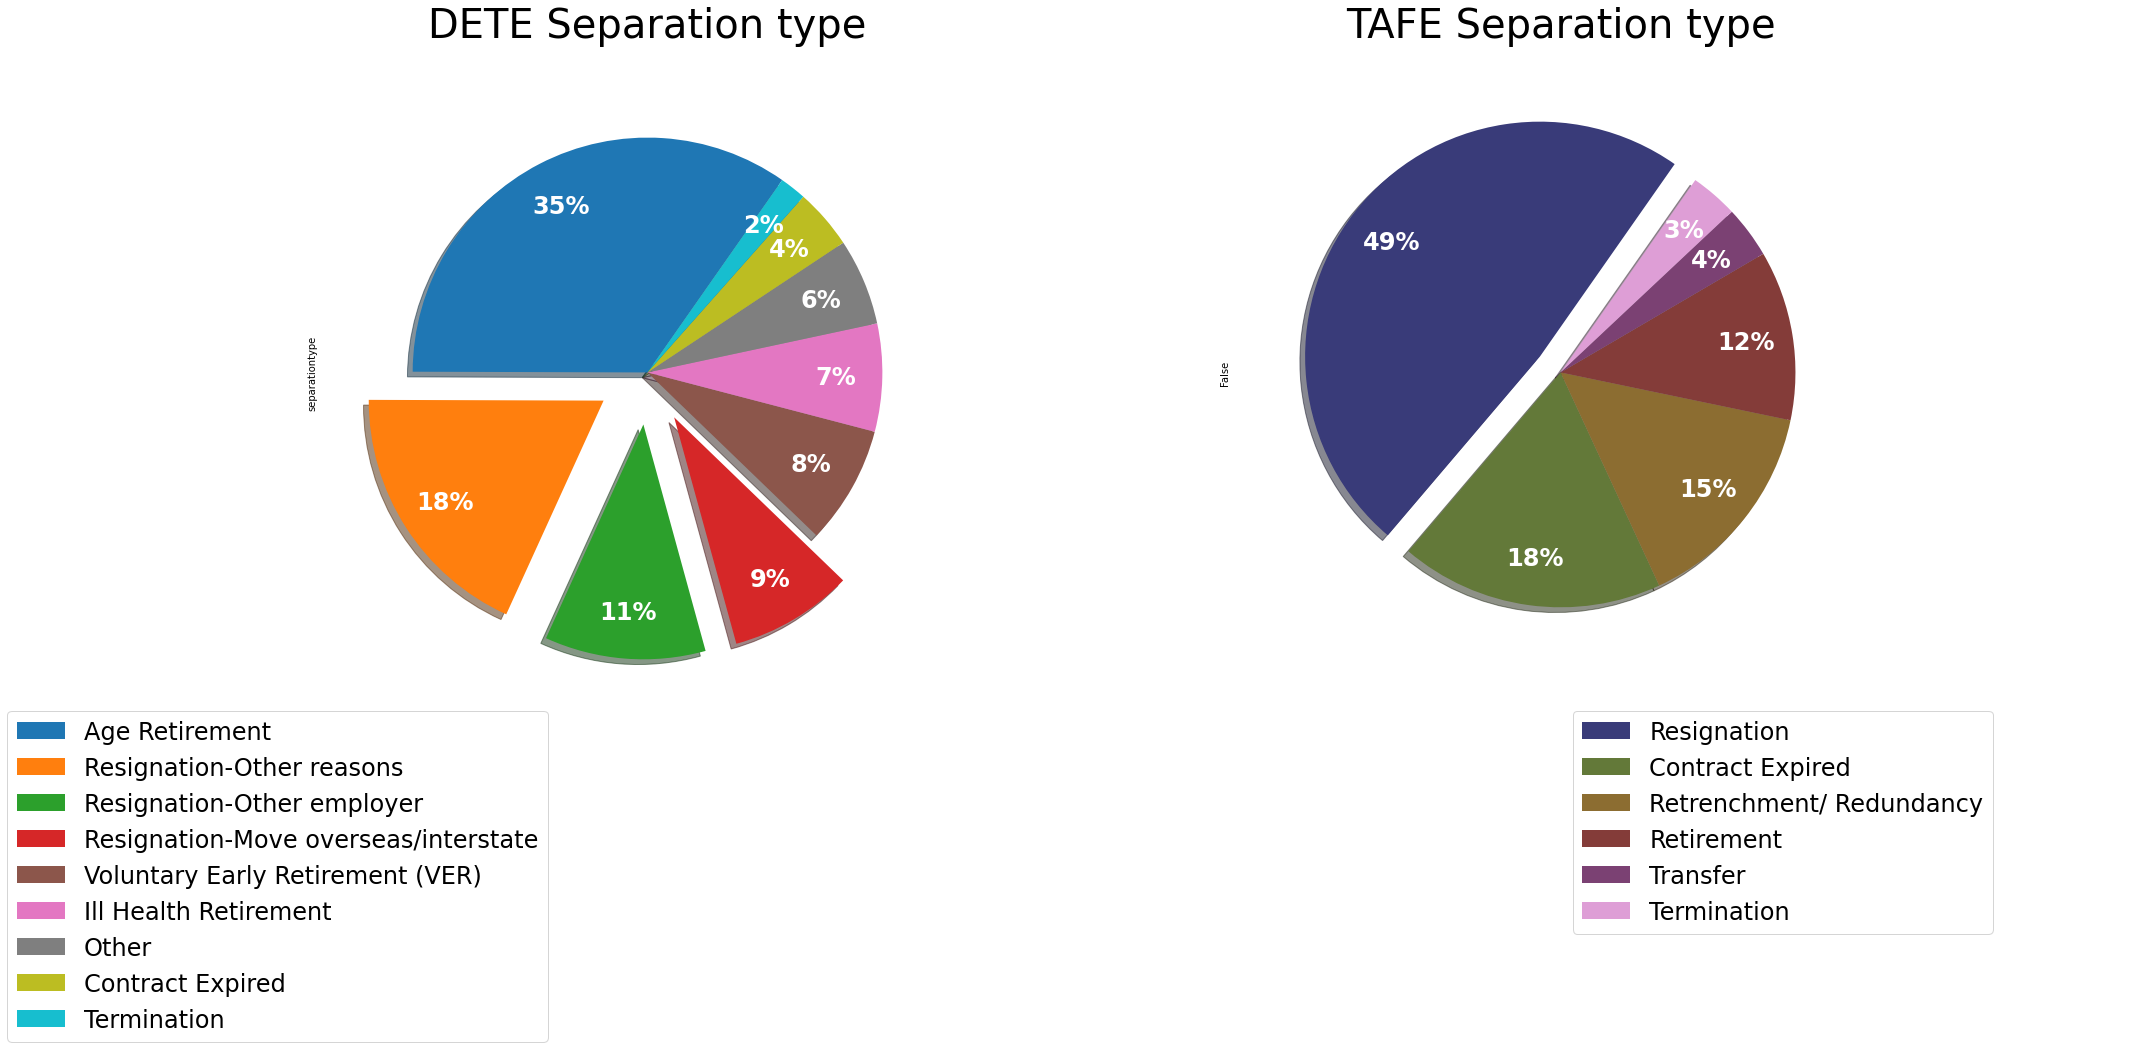

In [274]:
 
plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
dete_survey_updated["separationtype"].value_counts().plot(kind='pie',
                                                          autopct='%1.0f%%',
                                                          startangle=55,
                                                          cmap='tab10',
                                                          explode=(0,0.2,0.2,0.2,0,0,0,0,0),
                                                          textprops={'fontsize': 24,'color':"w", "weight":"bold"},
                                                          shadow=True,
                                                          radius=0.9,
                                                          pctdistance=0.8,
                                                          title="DETE Separation type",
                                                          
                                                          legend=True
                                                      )
plt.title('DETE Separation type', fontsize=40)   
plt.legend(loc="upper left", fontsize= 24,  bbox_to_anchor=(-0.5, 0, 1.5, 0))

plt.subplot(1,2,2)
tafe_survey_updated["separationtype"].value_counts().plot(kind='pie',
                                                          autopct='%1.0f%%',
                                                          startangle=55,
                                                          cmap='tab20b',
                                                          explode=(0.1,0,0,0,0,0),
                                                         
                                                          legend=True,
                                                          shadow=True,
                                                          radius=0.9,
                                                          pctdistance=0.8,
                                                          label=False,
                                                          title="TAFE Separation type",
                                                          textprops={'fontsize': 24, "weight":"bold",'color':"w" },
                                                         
                                                         )
plt.title('TAFE Separation type', fontsize=40)   
plt.legend(loc="upper left", fontsize= 24,  bbox_to_anchor=(0.5, 0, 1.5, 0))
plt.show()

Based on this results, we can see that the resignation has a big percentage among the reasons for employee exit.

* In the DETE, most employee exit because of retirement (by age,voluntary early and health)- 50%, followed closely by resignation(other reasons, employer, move overseas/interstate)-38%.
* In the TAFE, most employee exit because they resigned (49%), followed by contract expiration(18%), retrenchment (15%), and retirement (12%).



In [27]:
# identifying columns which we want to keep for our analyze

<font size="5" color="blue"> **DETE dataset**:</font>

In [28]:
dete_survey_updated["resignation"]=dete_survey_updated["separationtype"].str.contains(r'[Rr]esignation', regex=True)

In [29]:
dete_survey_updated["resignation"]

0      False
1      False
2      False
3       True
4      False
       ...  
817    False
818    False
819     True
820    False
821     True
Name: resignation, Length: 822, dtype: bool

In [30]:
tafe_survey_updated["resignation"]=tafe_survey_updated["separationtype"].str.contains(r'[Rr]esignation', regex=True)

In [31]:
tafe_survey_updated["resignation"]

0      False
1      False
2      False
3       True
4       True
       ...  
697     True
698     True
699     True
700    False
701     True
Name: resignation, Length: 702, dtype: object

In [32]:
# dropping rows with what we will not work

In [33]:
dete_resignation=dete_survey_updated.copy().set_index("resignation").drop(False)

In [34]:
dete_resignation

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
resignation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
True,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
True,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
True,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
True,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
True,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
True,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
True,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
True,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN


<font size="5" color="blue"> **TAFE dataset**:</font>

In [35]:
tafe_resignation=tafe_survey_updated.copy().set_index("resignation").drop(False)

In [36]:
tafe_resignation

,id,business_unit,workarea,cease_date,separationtype,career_move_to_public_sector,career_move_to_private_sector,self_employment,ill_health,maternity/family,dissatisfaction,job_dissatisfaction,interpersonal_conflict,study,travel,other,none_of_the_above,gender,age,employment_status,position,institute_service,role_service
resignation,,,,,,,,,,,,,,,,,,,,,,,
True,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
True,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
True,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
True,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
True,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
True,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
True,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
True,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN


<span style="background: yellow">**IMPORTANT:**</span>


Following dropping above rows we have smaller datasets, with what will be much more easier to work:
New datasets dimension:
- dete_survey_updated: 311 rows x 35 columns
- tafe_survey_updated: 341 rows x 23 columns


Now we are in conditions to analyze the following 2 information in order we can reply to the two questions in this project objectives:
1. Checking the lenght of service in each instition of employees that resigned
1. Checking dissatisfaction of employees that resigned


## 4 - Institution and Role Service time per institute

<font size="5" color="blue"> **Tafe dataset**:</font>

Let's us check the tafe dataset. Our date columns are:

- `institute_service` - The length of the person's employment in this institute (in years) - split per years ranges
- `role_service` - The length of the person's employment in the current workplace (in years)
- `cease_date ` - The year or month the person's employment ended


In [37]:
tafe_resignation["cease_date"].value_counts()

2011.0    117
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [38]:
tafe_resignation["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [39]:
tafe_resignation["role_service"].value_counts()

Less than 1 year      92
1-2                   74
3-4                   54
5-6                   22
11-20                 21
7-10                  19
More than 20 years     8
Name: role_service, dtype: int64

<font size="5" color="blue"> **DETE dataset**:</font>

In the dete we have:
- `cease_date`: The year or month the person's employment ended
- `dete_start_date`: The year the person began employment with the DETE
- `role_start_dat`: the year the person began the employment in the current workplace

First, if we only have the year that person began. We will disregard the month and put both columns at same format. 


Then, we will create one column with the difference between these values, then present the values between years ranges which will correspond to the `institute_service` and the `role_service` of tafe dataset


In [40]:
# 1 -  we will extract from the cease_date the year information:

In [41]:
dete_resignation["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [42]:
dete_resignation["cease_date"]=dete_resignation["cease_date"].astype(str)

In [43]:
dete_resignation["cease_date"].dtype

dtype('O')

In [44]:
dete_resignation["cease_date"]=dete_resignation["cease_date"].str.extract(r"([1-2]{1}[0-9]{3})")

In [45]:
dete_resignation["cease_date"]

resignation
True    2012
True    2012
True    2012
True    2012
True    2012
        ... 
True    2013
True    2014
True    2014
True    2014
True    2013
Name: cease_date, Length: 311, dtype: object

In [46]:
dete_resignation["cease_date"].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [47]:
dete_resignation["cease_date"]=dete_resignation["cease_date"].astype("float")

In [48]:
dete_resignation["cease_date"].dtype

dtype('float64')

In [49]:
# 2 -  we will check if dete_start_date at same format

In [50]:
dete_resignation["dete_start_date"].dtype

dtype('float64')

In [51]:
dete_resignation["dete_start_date"].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
2003.0     6
1998.0     6
1992.0     6
1994.0     6
1996.0     6
2002.0     6
1980.0     5
1997.0     5
1993.0     5
1990.0     5
1995.0     4
1989.0     4
1988.0     4
1991.0     4
1986.0     3
1985.0     3
2001.0     3
1976.0     2
1983.0     2
1974.0     2
1973.0     1
1971.0     1
1982.0     1
1987.0     1
1977.0     1
1963.0     1
1972.0     1
1984.0     1
1975.0     1
Name: dete_start_date, dtype: int64

In [52]:
dete_resignation["role_start_date"]

resignation
True    2006.0
True    1997.0
True    2009.0
True    2008.0
True    2009.0
         ...  
True    2010.0
True    2012.0
True    2012.0
True    2009.0
True       NaN
Name: role_start_date, Length: 311, dtype: float64

In [53]:
# 3 - we will calculate the period during what employee work at the institute and at current workplace:

In [54]:
dete_resignation["institute_service_exact_time"]=dete_resignation["cease_date"]-dete_resignation["dete_start_date"]

In [55]:
dete_resignation["institute_service_exact_time"].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service_exact_time, dtype: int64

<AxesSubplot:>

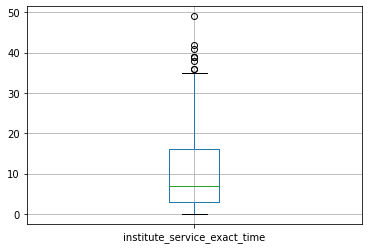

In [56]:
dete_resignation.boxplot("institute_service_exact_time")

In [57]:
dete_resignation["role_service_exact_time"]=dete_resignation["cease_date"]-dete_resignation["role_start_date"]

In [58]:
dete_resignation["role_service_exact_time"].value_counts().sort_index()

-1.0        1
 0.0       34
 1.0       38
 2.0       28
 3.0       27
 4.0       18
 5.0       21
 6.0       14
 7.0        9
 8.0        7
 9.0       10
 10.0       5
 11.0       7
 12.0       1
 13.0       1
 14.0       7
 15.0       4
 16.0       4
 17.0       2
 18.0       2
 19.0       1
 20.0       4
 21.0       2
 22.0       2
 23.0       3
 24.0       4
 25.0       1
 26.0       1
 27.0       1
 30.0       1
 32.0       1
 36.0       2
 1813.0     1
Name: role_service_exact_time, dtype: int64

<AxesSubplot:>

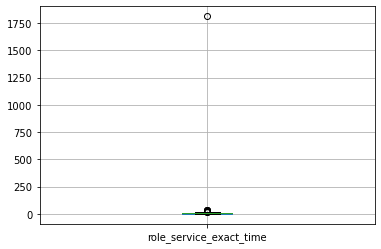

In [59]:
dete_resignation.boxplot("role_service_exact_time")

**CONCLUSION: based ont this data reffering the role service in the dete, we should disregard "-1" and "1813".**

In [60]:
# 4 - we will present the information in ranges of year

In [61]:
#if we just want split the data by random bins:
dete_resignation["institute_service_exact_time"].value_counts(bins=7).sort_index()

(-0.05, 7.0]    145
(7.0, 14.0]      52
(14.0, 21.0]     36
(21.0, 28.0]     21
(28.0, 35.0]     10
(35.0, 42.0]      8
(42.0, 49.0]      1
Name: institute_service_exact_time, dtype: int64

In [62]:
#if we just want split the data exactly in a specific bins:
bins=[(-1, 1), (1, 2), (2, 4), (4, 6), (6, 10), (10, 20), (20,49)]

index=pd.IntervalIndex.from_tuples(bins)
intervals=index.values
labels=["Less than 1 year", "1-2", "3-4", "5-6", "7-10", "11-20", "More than 20 years"]
to_name={interval:label for interval, label in zip(intervals,labels)}

dete_resignation["institute_service"]=pd.CategoricalIndex(pd.cut(dete_resignation["institute_service_exact_time"], bins=index)).rename_categories(to_name)


In [63]:
dete_resignation["institute_service"].value_counts().sort_index()

Less than 1 year      42
1-2                   14
3-4                   36
5-6                   40
7-10                  41
11-20                 57
More than 20 years    43
Name: institute_service, dtype: int64

In [64]:
bins=[(-1, 1), (1, 2), (2, 4), (4, 6), (6, 10), (10, 20), (20,49)]

index=pd.IntervalIndex.from_tuples(bins)
intervals=index.values
labels=["Less than 1 year", "1-2", "3-4", "5-6", "7-10", "11-20", "More than 20 years"]
to_name={interval:label for interval, label in zip(intervals,labels)}

#dete_resignation["role_service"]=pd.cut(dete_resignation["role_service_exact_time"], bins=bins, labels=labels, ordered=True)
dete_resignation["role_service"]=pd.CategoricalIndex(pd.cut(dete_resignation["role_service_exact_time"], bins=index)).rename_categories(to_name)


In [65]:
dete_resignation["role_service"].value_counts().sort_index()

Less than 1 year      72
1-2                   28
3-4                   45
5-6                   35
7-10                  31
11-20                 33
More than 20 years    18
Name: role_service, dtype: int64

## 5 - Dissatisfaction of employees per institute

The following columns are the columns that identified if employees resigned becauase dissatisfaction or not.
This columns must only contains boolean (True, False, NaN).
If the employee indicated any of these factors caused them to resign, we'll mark them as dissatisfied in a new column. 

<img src="dissatisfaction.png">


**Tafe survey:**
The columns reffering to dissatisfaction are the following and are not with boolean description, yet:
* dissatisfaction 
* job_dissatisfaction
    
**Dete survey:**
The columns reffering to dissatisfaction are the following and are already with boolean description:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload



### 5.1 - TAFE: Converting content of dissatisfaction columns to boolean content:

In [66]:
#rechecking content of each column:

In [67]:
tafe_resignation["dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: dissatisfaction, dtype: int64

In [68]:
tafe_resignation["job_dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: job_dissatisfaction, dtype: int64

In [69]:
#create a function to change the column content:

In [70]:
def label(element, x):
    if element == x:
        return True
    elif element== "-":
        return False
    else:
        return None

In [71]:
# convert the column content in boolean value:

In [72]:
tafe_resignation["dissatisfaction_bol"]=tafe_resignation["dissatisfaction"].apply(label, x="Contributing Factors. Dissatisfaction ")

In [73]:
tafe_resignation["dissatisfaction_bol"].value_counts(dropna=False)

False    277
True      55
NaN        9
Name: dissatisfaction_bol, dtype: int64

In [74]:
tafe_resignation["job_dissatisfaction_bol"]=tafe_resignation["job_dissatisfaction"].apply(label, x="Job Dissatisfaction")

In [75]:
tafe_resignation["job_dissatisfaction_bol"].value_counts(dropna=False)

False    270
True      62
NaN        9
Name: job_dissatisfaction_bol, dtype: int64

### 5.2 - TAFE: Creating dissatisfied column for each dataset -> if true means this was the reason for the resignation

**tafe survey:**

In [76]:
# create a new column if with final classification:

In [77]:
tafe_resignation["dissatisfied"]=tafe_resignation[["dissatisfaction_bol","job_dissatisfaction_bol"]].any(axis=1, skipna=False)

In [78]:
tafe_resignation["dissatisfied"]. value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

**dete survey:**

In [79]:
dete_resignation["dissatisfied"]=dete_resignation[["job_dissatisfaction",
    "dissatisfaction_with_the_department",
    "physical_work_environment",
    "lack_of_recognition",
    "lack_of_job_security",
    "work_location",
    "employment_conditions",
    "work_life_balance",
    "workload"]].any(axis=1, skipna=False)

In [80]:
dete_resignation["dissatisfied"]. value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

## 6 - Combining the datasets

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

* Add a column named institute to dete_resignation. Each row should contain the value DETE.
* Add a column named institute to tafe_resignation. Each row should contain the value TAFE.


In [81]:
dete_resignation["institute"]="DETE"

In [82]:
tafe_resignation["institute"]="TAFE"

In [83]:
combined=pd.concat([dete_resignation,tafe_resignation])

In [84]:
combined

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service_exact_time,role_service_exact_time,institute_service,role_service,dissatisfied,institute,workarea,self_employment,dissatisfaction,interpersonal_conflict,study,travel,other,dissatisfaction_bol,job_dissatisfaction_bol
resignation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
True,4.000000e+00,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,6.0,7-10,5-6,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
True,6.000000e+00,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,15.0,11-20,11-20,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
True,9.000000e+00,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3-4,3-4,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
True,1.000000e+01,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,4.0,11-20,3-4,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
True,1.200000e+01,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3-4,3-4,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
True,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,Southern Queensland Institute of TAFE,Temporary Full-time,-,Career Move - Private Sector,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,NaN,NaN,NaN,-,Male,21 25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5-6,5-6,False,TAFE,Non-Delivery (corporate),-,-,-,-,-,-,False,False
True,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,Barrier Reef Institute of TAFE,Temporary Full-time,Career Move - Public Sector,-,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,NaN,NaN,NaN,-,Male,51-55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2,1-2,False,TAFE,Delivery (teaching),-,-,-,-,-,-,False,False
True,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,Southern Queensland Institute of TAFE,NaN,Career Move - Public Sector,-,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE,Non-Delivery (corporate),-,-,-,-,-,-,False,False


### 6.1 - Drop columns with many missing values

In [85]:
combined.notnull().sum().sort_values()

torres_strait                            0
south_sea                                3
aboriginal                               7
disability                               8
nesb                                     9
classification                         161
role_service_exact_time                264
region                                 265
role_start_date                        271
institute_service_exact_time           273
dete_start_date                        283
work_life_balance                      311
employment_conditions                  311
study/travel                           311
relocation                             311
workload                               311
work_location                          311
traumatic_incident                     311
lack_of_recognition                    311
physical_work_environment              311
interpersonal_conflicts                311
lack_of_job_security                   311
dissatisfaction_with_the_department    311
self_employ

In [86]:
combined_updated=combined.copy().dropna(axis=1, thresh=500)

In [87]:
combined_updated

,id,separationtype,cease_date,position,employment_status,career_move_to_public_sector,career_move_to_private_sector,job_dissatisfaction,maternity/family,ill_health,none_of_the_above,gender,age,institute_service,role_service,dissatisfied,institute
resignation,,,,,,,,,,,,,,,,,
True,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,False,True,False,False,False,False,Female,36-40,7-10,5-6,False,DETE
True,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,False,True,False,True,False,False,Female,41-45,11-20,11-20,True,DETE
True,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,False,True,False,False,False,False,Female,31-35,3-4,3-4,False,DETE
True,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,False,False,True,False,False,False,Female,46-50,11-20,3-4,True,DETE
True,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,False,False,False,True,False,False,Male,31-35,3-4,3-4,False,DETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
True,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,-,Career Move - Private Sector,-,-,-,-,Male,21 25,5-6,5-6,False,TAFE
True,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Career Move - Public Sector,-,-,-,-,-,Male,51-55,1-2,1-2,False,TAFE
True,6.350677e+17,Resignation,2013.0,NaN,NaN,Career Move - Public Sector,-,-,-,-,-,NaN,NaN,NaN,NaN,False,TAFE


Since this moment we will work only with columns with at least 500 non null values (after combined both dataset), this means that are the common columns between dataset with less missing values.

## Resignation vs Institute Service Time vs Dissatisfaction 

###  7.1 - Resignation vs Institute_Service time

In [88]:
combined_updated["institute_service"].value_counts()

Less than 1 year      115
3-4                    99
11-20                  83
1-2                    78
5-6                    73
7-10                   62
More than 20 years     53
Name: institute_service, dtype: int64

As we saw before, we have 7 ranges of years for `institute_service` and `role_service`.
However in order to simplify, we decided to reduce it to the following 4 ranges of years and classification:

    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company


In [89]:
def label_service_time(element):
    if element == "Less than 1 year" or element == "1-2":
        return "New"
    elif element == "3-4" or element == "5-6":
        return "Experienced"
    elif element == "7-10":
        return "Established"
    elif element == "11-20" or element == "More than 20 years":
        return "Veteran"
    else:
        return None

In [90]:
combined_updated["service_cat"]=combined_updated["institute_service"].apply(label_service_time)

In [326]:
service_cat_dist=combined_updated["service_cat"].value_counts()

In [327]:
service_cat_dist

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

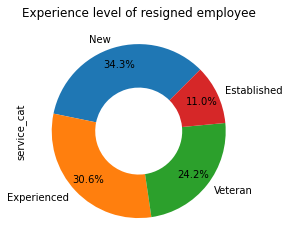

In [374]:
service_cat_dist.plot(kind='pie', subplots=True, wedgeprops=dict(width=.5),
                      startangle=45, autopct="%1.1f%%", pctdistance=0.8
                     )
plt.title("Experience level of resigned employee")
plt.show()

<span style="background: yellow">IMPORTANT</span>
Based on this results we can conclude that the majority of employers that resigned are the newer employees

### 7.2 - Resignation vs Dissatisfaction

In [276]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        9
Name: dissatisfied, dtype: int64

In [292]:
print("IMPORTANT:"
 "\n"   
    "Rechecking the results about the dissatisfaction frequency, we can conclude: \n"
f"* only {240/(403+240+9)*100:,.2f}% of employees confirmed that dissastifaction were the motivation for their resignation.\n"
f"* {403/(403+240+9)*100:,.2f}% of employees are not dissastified\n"
f"* and the remaining {9/(403+240+9)*100:,.2f}% of employees didn't reply to this question\n"
"\n"
"--> As the percentage of NULL values are too small, we will replace this values, for the most common value in this column.\n"
    "So we will replace NaN values by FALSE"     )

IMPORTANT:
Rechecking the results about the dissatisfaction frequency, we can conclude: 
* only 36.81% of employees confirmed that dissastifaction were the motivation for their resignation.
* 61.81% of employees are not dissastified
* and the remaining 1.38% of employees didn't reply to this question

--> As the percentage of NULL values are too small, we will replace this values, for the most common value in this column.
So we will replace NaN values by FALSE


In [298]:
#replacing NaN values by FALSE

In [295]:
combined_updated["dissatisfied"]=combined_updated["dissatisfied"].fillna(False)

In [296]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    412
True     240
Name: dissatisfied, dtype: int64

In [ ]:
#creating pivot table comparing dissastified and service_cat

In [307]:
dissatisfaction_pvt=combined_updated.pivot_table(values="dissatisfied", index="service_cat")

In [308]:
dissatisfaction_pvt

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


In [309]:
# creating plot of the results

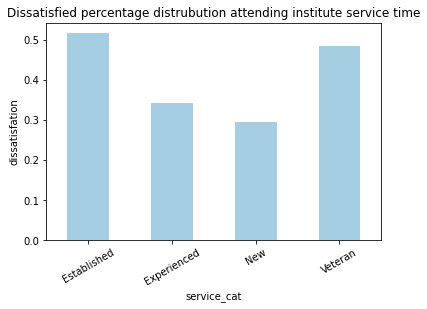

In [384]:
dissatisfaction_pvt.plot(kind="bar", rot=30, legend =False, colormap='Paired')
plt.title("Dissatisfied percentage distrubution attending institute service time")
plt.ylabel("dissatisfation")
plt.show()

<span style="background: yellow">IMPORTANT</span>
Based on this results, the most dissatisfied employees that resigned are the ones that worked for the institutes for a long periods

## 8 - Conclusions:

We checked that there are different kind of exits from their job. We focus our analyze in the resignation type, which represent a big part of employees exits from this institutes: <br> <img src="separationtypes.png">

After check the information regarding dissatisfaction and institute service times, we are in conditions to reply to our initial questions:

1.    **Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**
2.   **Are the younger employees resigning due to some kind of dissatisfaction? What about older employees?**

- Based on data: the majority of employees that resigned worked for the institutes for a short period (less than 6 years)


- The most dissatisfied employees that resigned are the ones that worked for the institutes for a long periods (more than 7 years)

So we can conclude that employees with 7 or more years of service in institute are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.



|Employees_category|TT resigned employees|    % dissatisfied employees|
     |---|---| ---|  
    |New: Less than 3 years at a company       |  193|29.53%|
    |Experienced: 3-6 years at a company  |  172|34.30%|
    |Established: 7-10 years at a company |   62|51.61%|
    |    Veteran: 11 or more years at a company    |  136|48.53%|


<table><tr>
    <td><img src="institute_service_time.png"></td>
    <td><img src="dissatisfied.png"></td>
 </tr></table>

## 9 - Bibligraphy:

* Stack overflow: [How to rename categories after using pandas.cut with IntervalIndex?](https://stackoverflow.com/questions/55204418/how-to-rename-categories-after-using-pandas-cut-with-intervalindex)
* Stack overflow: [How to change plot colors?](https://stackoverflow.com/questions/43938425/matplotlib-change-colormap-tab20-to-have-three-colors)
* Matplotlib.org: [Pie plot proprieties](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_demo2.html?highlight=textprops), [pie plot arguments](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie) and [text proprieties](https://matplotlib.org/stable/tutorials/text/text_props.html)